# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Fadhilah]
- **Email:** [muhammadfadhilah443@gmail.com]
- **ID Dicoding:** [m_fadhtraktor]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap angka penyewaan sepeda?
- Bagaimana pengaruh hari terhadap angka penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv("https://raw.githubusercontent.com/mfadhtraktor/proyek-dicoding-176351/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data berformat .csv, sehingga menggunakan function Panda `read_csv()`.

### Assessing Data

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Terdapat kesalahan tipe data pada kolom "dteday".

### Cleaning Data

In [9]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data pada kolom "dteday" telah diubah ke tipe datetime64[ns].

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [10]:
  weathersit_df = day_df.groupby("weathersit").cnt.sum().sort_values(ascending=False).reset_index()
  weathersit_df.head()

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


In [11]:
weekday_df = day_df.groupby("weekday").cnt.sum().sort_values(ascending=False).reset_index()
weekday_df.head(7)

,weekday,cnt
0,5,487790
1,4,485395
2,6,477807
3,3,473048
4,2,469109
5,1,455503
6,0,444027


**Insight:**
- Data dikelompokkan berdasarkan pertanyaan-pertanyaan yang ada.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [12]:
weathersit_df.rename(columns={
    "weathersit": "Kondisi Cuaca",
    "cnt": "Jumlah Penyewaan"
}, inplace=True)
weathersit_df.replace({
    1: "Cerah",
    2: "Berkabut",
    3: "Hujan Ringan"
}, inplace=True)
weathersit_df.head()

,Kondisi Cuaca,Jumlah Penyewaan
0,Cerah,2257952
1,Berkabut,996858
2,Hujan Ringan,37869


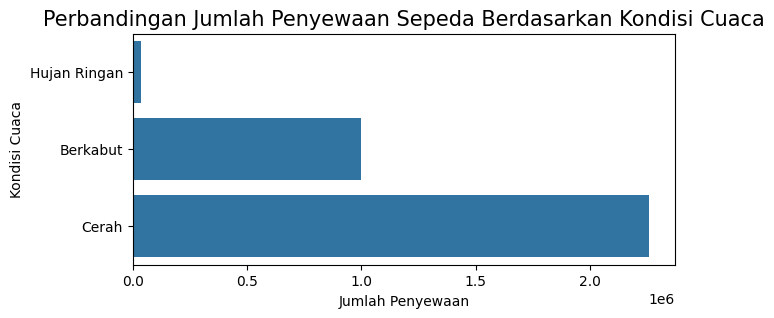

In [13]:
plt.figure(figsize=(7, 3))
sns.barplot(y="Kondisi Cuaca", x="Jumlah Penyewaan", data=weathersit_df.sort_values(by="Jumlah Penyewaan", ascending=True), orient="h")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Kondisi Cuaca")
plt.title("Perbandingan Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca", loc="center", fontsize=15)
plt.show()

### Pertanyaan 2:

In [14]:
weekday_df.rename(columns={
    "weekday": "Hari",
    "cnt": "Jumlah Penyewaan"
}, inplace=True)
weekday_df.replace({
    0: "Minggu",
    1: "Senin",
    2: "Selasa",
    3: "Rabu",
    4: "Kamis",
    5: "Jumat",
    6: "Sabtu"
}, inplace=True)
weekday_df.head(7)

,Hari,Jumlah Penyewaan
0,Jumat,487790
1,Kamis,485395
2,Sabtu,477807
3,Rabu,473048
4,Selasa,469109
5,Senin,455503
6,Minggu,444027


<ipython-input-15-468d240cd5fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Jumlah Penyewaan", x="Hari", data=weekday_df, palette=colors)


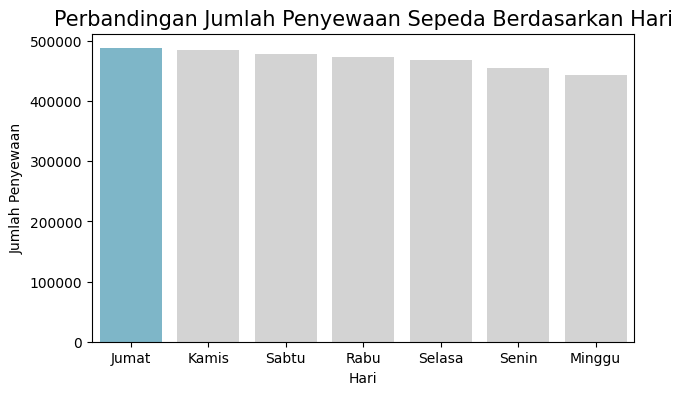

In [15]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(7, 4))
sns.barplot(y="Jumlah Penyewaan", x="Hari", data=weekday_df, palette=colors)
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan")
plt.title("Perbandingan Jumlah Penyewaan Sepeda Berdasarkan Hari", loc="center", fontsize=15)
plt.show()

**Insight:**
- Visualisasi dari data-data yang telah dikelompokkan menunjukkan adanya pengaruh dari kondisi cuaca, namun hampir tidak memiliki pengaruh dari hari terhadap jumlah penyewaan sepeda.

## Conclusion

- Berdasarkan visualisasi data di atas, kondisi cuaca sangat berpengaruh terhadap jumlah penyewaan sepeda. Dapat dilihat pada kondisi cuaca berkabut jumlah penyewaan sepeda turun lebih dari setengah jumlah penyewaan sepeda pada kondisi cuaca cerah. Pada kondisi cuaca hujan ringan, jumlah penyewaan sepeda turun drastis dibanding saat kondisi cuaca cerah.
- Berdasarkan visualisasi data di atas, pengaruh hari pada jumlah penyewaan sepeda hampir tidak memiliki pengaruh. Terlihat grafik yang hampir simetris. Terjadi penurunan angka di hari Minggu sampai Rabu, namun tidak terlalu signifikan. Semua hari memiliki jumlah penyewaan sepeda di angka empat ratus ribu lebih.